In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
 base_path = '/content/drive/MyDrive/PROYECTO FINAL TEXT MINING/imagenes/'

In [ ]:
str_img = '/content/drive/MyDrive/PROYECTO FINAL TEXT MINING/imagenes/train_set'

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, array_to_img, img_to_array

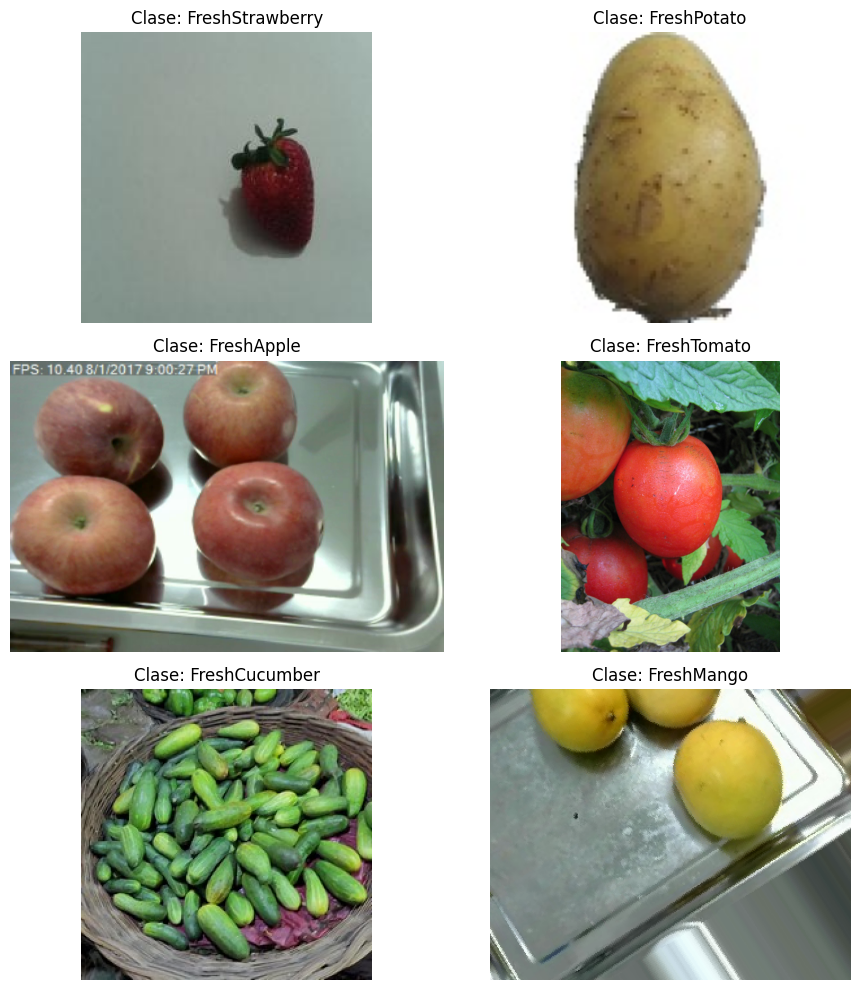

In [ ]:
import os
import random
from tensorflow.keras.preprocessing.image import load_img
import matplotlib.pyplot as plt


base_path = str_img
# Lista de subcarpetas (clases)
class_folders = os.listdir(base_path)

# Inicializa lista
random_images = []

# Iteracion  sobre cada carpeta de clase
for class_name in class_folders:
    class_path = os.path.join(base_path, class_name)
    if os.path.isdir(class_path):

        images = os.listdir(class_path)
        if images:

            random_image_name = random.choice(images)
            random_image_path = os.path.join(class_path, random_image_name)
            # Cargar la imagen
            random_image = load_img(random_image_path)
            random_images.append((class_name, random_image))

# Mostrar las imágenes
plt.figure(figsize=(10, 10))
for idx, (class_name, image) in enumerate(random_images):
    plt.subplot(3, 2, idx + 1)
    plt.imshow(image)
    plt.title(f'Clase: {class_name}')
    plt.axis('off')
plt.tight_layout()
plt.show()


In [ ]:
data_augmentation_process = ImageDataGenerator(
    rescale=1/255,
    zoom_range=0.3,
    horizontal_flip=True,
    vertical_flip=True,
    shear_range=0.5
)

In [ ]:
# Crea el directorio de preview si no existe
preview_dir = '/content/drive/MyDrive/PROYECTO FINAL TEXT MINING/imagenes/preview'
if not os.path.exists(preview_dir):
    os.makedirs(preview_dir)

# Lista de subcarpetas (clases)
class_folders = os.listdir(base_path)

for class_name in class_folders:
    class_path = os.path.join(base_path, class_name)
    if os.path.isdir(class_path):

        class_preview_dir = os.path.join(preview_dir, class_name)
        if not os.path.exists(class_preview_dir):
            os.makedirs(class_preview_dir)


        images = os.listdir(class_path)
        if images:

            random_image_name = random.choice(images)
            random_image_path = os.path.join(class_path, random_image_name)
            img = load_img(random_image_path, target_size=(64, 64))
            img_temp = img_to_array(img)
            img_temp = img_temp.reshape((1, ) + img_temp.shape)

            # Generar imágenes aumentadas
            i = 0
            for img_instance in data_augmentation_process.flow(img_temp,
                                                                batch_size=1,
                                                                save_to_dir=class_preview_dir,
                                                                save_format='jpg'):
                i += 1
                if i > 10:  # Generar 10 imágenes aumentadas
                    break

### Data Augmentation  y Input Data Flow  para Train

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Ruta de la carpeta que contiene las subcarpetas de clases
base_path = '/content/drive/MyDrive/PROYECTO FINAL TEXT MINING/imagenes/train_set/'

# Inicializa el generador de datos de aumento
data_augmentation_process = ImageDataGenerator(
    rescale=1/255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Crea el flujo de datos a partir del directorio de entrenamiento
train_data_flow = data_augmentation_process.flow_from_directory(
    directory=base_path,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical'
)

Found 2491 images belonging to 6 classes.


### Data Augmentation y Input Data Flow para Test


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Ruta de la carpeta que contiene las subcarpetas de clases para test
test_base_path = '/content/drive/MyDrive/PROYECTO FINAL TEXT MINING/imagenes/test_set/'

# Inicializa el generador de datos para test
test_data_generator = ImageDataGenerator(
    rescale=1/255  # Normaliza los valores de píxeles a [0, 1]
)

# Crea el flujo de datos a partir del directorio de test
test_data_flow = test_data_generator.flow_from_directory(
    directory=test_base_path,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

Found 1155 images belonging to 6 classes.


### Definimos Red Neurona


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten

### Modelo No.1 Arquitectura de Red

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

# Inicialización del modelo
cnn_v1 = Sequential()

# Fase de preprocesamiento
cnn_v1.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=(64, 64, 3)))
cnn_v1.add(MaxPool2D(pool_size=(2, 2)))

cnn_v1.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))  # Se puede agregar otra capa Conv2D
cnn_v1.add(MaxPool2D(pool_size=(2, 2)))

cnn_v1.add(Flatten())
cnn_v1.add(Dense(units=128, activation='relu'))

# Capa de salida para clasificación multiclase
cnn_v1.add(Dense(units=6, activation='softmax'))  # 6 unidades y softmax para clasificación multiclase

# Compilación del modelo
cnn_v1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Resumen del modelo
cnn_v1.summary()  # Para ver la arquitectura del modelo


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 62, 62, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 31, 31, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 29, 29, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,287,814 (12.54 MB)

 Trainable params: 3,287,814 (12.54 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Entrenamiento del modelo
cnn_v1.fit(
    train_data_flow,
    steps_per_epoch=train_data_flow.samples // train_data_flow.batch_size,
    epochs=10,  # Número de épocas
    validation_data=test_data_flow,  # Datos de validación
    validation_steps=test_data_flow.samples // test_data_flow.batch_size
)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 9/77 ━━━━━━━━━━━━━━━━━━━━ 7:05 6s/step - accuracy: 0.2218 - loss: 2.5018

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


77/77 ━━━━━━━━━━━━━━━━━━━━ 761s 9s/step - accuracy: 0.3115 - loss: 1.7978 - val_accuracy: 0.5009 - val_loss: 1.1077
Epoch 2/10
 1/77 ━━━━━━━━━━━━━━━━━━━━ 53s 698ms/step - accuracy: 0.6562 - loss: 0.9423

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


77/77 ━━━━━━━━━━━━━━━━━━━━ 10s 120ms/step - accuracy: 0.6562 - loss: 0.9423 - val_accuracy: 1.0000 - val_loss: 0.4189
Epoch 3/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 114s 1s/step - accuracy: 0.6870 - loss: 0.8784 - val_accuracy: 0.5312 - val_loss: 1.1259
Epoch 4/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 618us/step - accuracy: 0.7812 - loss: 0.6710 - val_accuracy: 1.0000 - val_loss: 0.4540
Epoch 5/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - accuracy: 0.8023 - loss: 0.6059 - val_accuracy: 0.8151 - val_loss: 0.6685
Epoch 6/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 541us/step - accuracy: 0.8438 - loss: 0.4913 - val_accuracy: 1.0000 - val_loss: 0.1239
Epoch 7/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 79s 982ms/step - accuracy: 0.8517 - loss: 0.4621 - val_accuracy: 0.6753 - val_loss: 0.9495
Epoch 8/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 514us/step - accuracy: 0.8750 - loss: 0.3428 - val_accuracy: 1.0000 - val_loss: 0.2060
Epoch 9/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - accuracy: 0.8772 - loss: 0.3529 - val_accuracy: 0.7092 - val_los

### Prueba con Imagenes Nuevas

In [ ]:
# Nombres de las clases
class_names = ['Manzana', 'Pepino', 'Mango', 'Papa', 'Fresa', 'Tomate']


In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [ ]:

print(train_data_flow.class_indices)


{'FreshApple': 0, 'FreshCucumber': 1, 'FreshMango': 2, 'FreshPotato': 3, 'FreshStrawberry': 4, 'FreshTomato': 5}


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


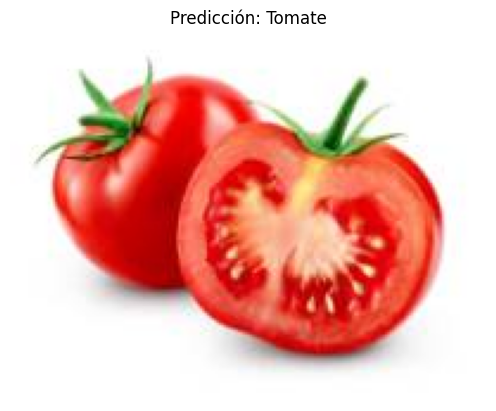

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


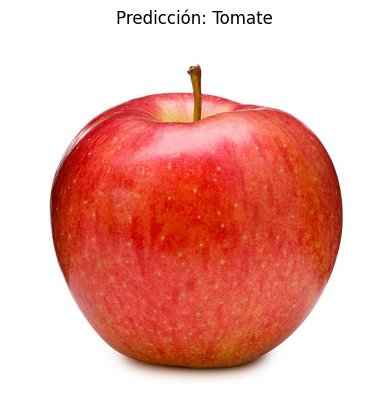

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


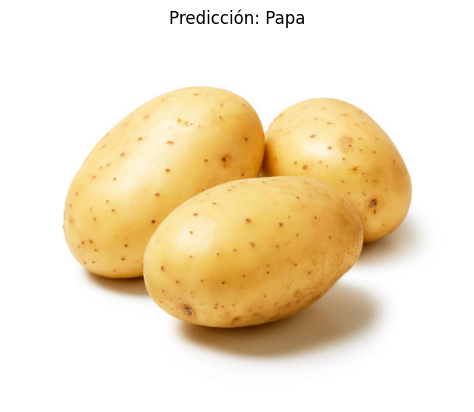

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


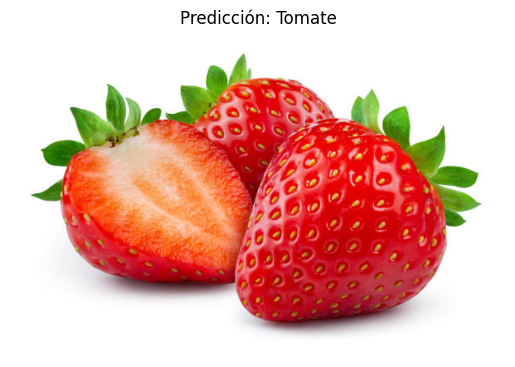

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


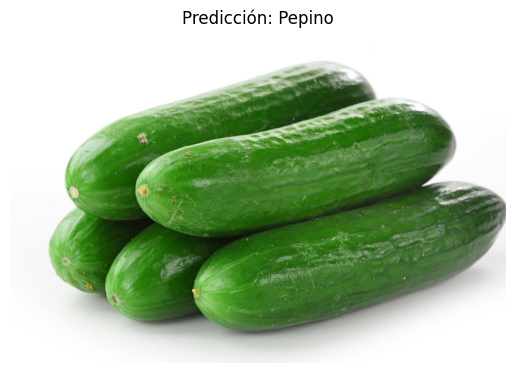

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


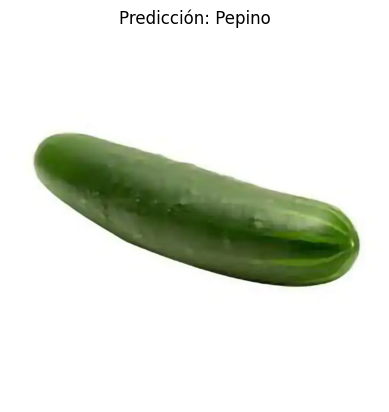

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


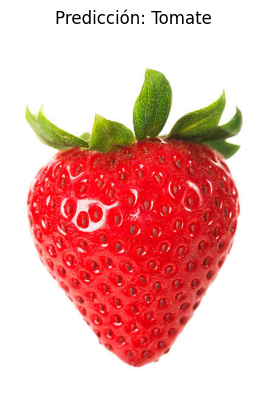

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


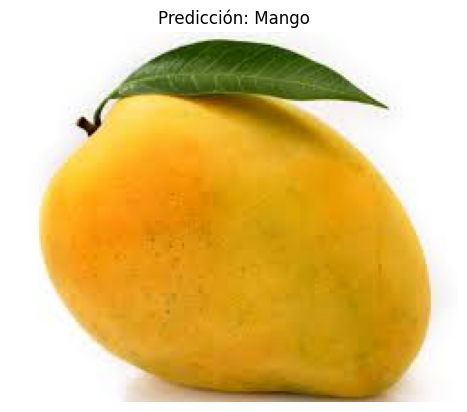

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


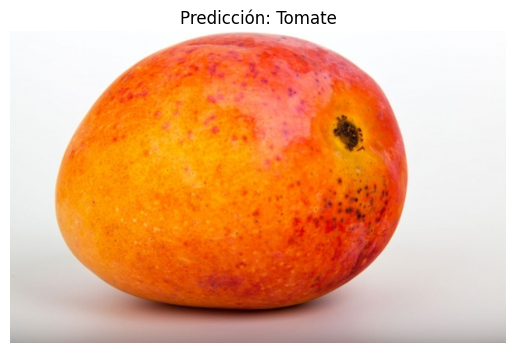

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


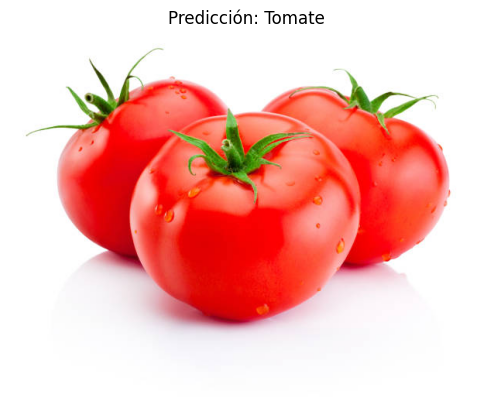

In [ ]:
def load_and_preprocess_image(image_path):
    img = load_img(image_path, target_size=(64, 64))  # Ajusta el tamaño según tu modelo
    img_array = img_to_array(img)
    img_array = img_array / 255.0  # Normaliza los valores a [0, 1]
    img_array = np.expand_dims(img_array, axis=0)  # Agrega una dimensión para el lote
    return img_array

# Ruta de la carpeta con imágenes de prueba
folder_path = '/content/drive/MyDrive/PROYECTO FINAL TEXT MINING/imagenes/pruebas'

# Lista de imágenes en la carpeta
image_files = os.listdir(folder_path)

# Predecir y mostrar imágenes
for image_file in image_files:
    image_path = os.path.join(folder_path, image_file)
    if os.path.isfile(image_path):
        # Cargar y preprocesar la imagen
        image_to_predict = load_and_preprocess_image(image_path)

        # Hacer la predicción
        predictions = cnn_v1.predict(image_to_predict)

        # Obtener la clase predicha
        predicted_class_index = np.argmax(predictions, axis=1)[0]
        predicted_class_name = class_names[predicted_class_index]  # Obtener el nombre de la clase

        # Mostrar la imagen y el resultado
        plt.imshow(load_img(image_path))
        plt.title(f'Predicción: {predicted_class_name}')
        plt.axis('off')
        plt.show()

### Evaluacion de Modelo

In [ ]:
loss, accuracy = cnn_v1.evaluate(test_data_flow, steps=100)  # Ajusta steps según tu conjunto de prueba
print(f'Pérdida: {loss:.4f}')
print(f'Precisión: {accuracy:.4f}')


100/100 ━━━━━━━━━━━━━━━━━━━━ 16s 160ms/step - accuracy: 0.6824 - loss: 0.9160
Pérdida: 0.8771
Precisión: 0.7100


### Modelo No.2 Arquitectura de Red

1.   Elemento de la lista
2.   Elemento de la lista



In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

# Inicialización del modelo
cnn_v3 = Sequential()

# Primera capa convolucional
cnn_v3.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(64, 64, 3)))
cnn_v3.add(BatchNormalization())
cnn_v3.add(MaxPooling2D(pool_size=(2, 2)))
cnn_v3.add(Dropout(0.25))

# Segunda capa convolucional
cnn_v3.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
cnn_v3.add(BatchNormalization())
cnn_v3.add(MaxPooling2D(pool_size=(2, 2)))
cnn_v3.add(Dropout(0.25))

# Tercera capa convolucional
cnn_v3.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
cnn_v3.add(BatchNormalization())
cnn_v3.add(MaxPooling2D(pool_size=(2, 2)))
cnn_v3.add(Dropout(0.25))

# Cuarta capa convolucional
cnn_v3.add(Conv2D(filters=256, kernel_size=(3, 3), activation='relu'))
cnn_v3.add(BatchNormalization())
cnn_v3.add(MaxPooling2D(pool_size=(2, 2)))
cnn_v3.add(Dropout(0.25))

# Aplanar la salida para las capas densas
cnn_v3.add(Flatten())

# Capa densa intermedia
cnn_v3.add(Dense(units=512, activation='relu'))
cnn_v3.add(Dropout(0.5))  # Aumentar el Dropout para evitar sobreajuste

# Capa de salida para clasificación multiclase
cnn_v3.add(Dense(units=6, activation='softmax'))  # 6 unidades y softmax para clasificación multiclase

# Compilación del modelo
cnn_v3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Resumen del modelo
cnn_v3.summary()  # Para ver la arquitectura del modelo



Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 62, 62, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 29, 29, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 29, 29, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 12, 12, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 12, 12, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 4, 4, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 4, 4, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 2, 2, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 2, 2, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 918,214 (3.50 MB)

 Trainable params: 917,254 (3.50 MB)

 Non-trainable params: 960 (3.75 KB)

In [ ]:
# Entrenamiento del modelo 2
cnn_v3.fit(
    train_data_flow,
    steps_per_epoch=train_data_flow.samples // train_data_flow.batch_size,
    epochs=10,  # Número de épocas
    validation_data=test_data_flow,  # Datos de validación
    validation_steps=test_data_flow.samples // test_data_flow.batch_size
)


Epoch 1/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 87s 1s/step - accuracy: 0.4317 - loss: 2.2987 - val_accuracy: 0.1363 - val_loss: 5.4173
Epoch 2/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 881us/step - accuracy: 0.6250 - loss: 1.1780 - val_accuracy: 0.0000e+00 - val_loss: 8.0684
Epoch 3/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 152s 1s/step - accuracy: 0.6877 - loss: 0.9795 - val_accuracy: 0.1363 - val_loss: 9.0250
Epoch 4/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8125 - loss: 0.5583 - val_accuracy: 0.0000e+00 - val_loss: 14.7779
Epoch 5/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 79s 963ms/step - accuracy: 0.7850 - loss: 0.6386 - val_accuracy: 0.1788 - val_loss: 5.5361
Epoch 6/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 5s 58ms/step - accuracy: 0.9375 - loss: 0.2753 - val_accuracy: 0.0000e+00 - val_loss: 10.7653
Epoch 7/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 688ms/step - accuracy: 0.8209 - loss: 0.5242

### Prueba con imagenes nuevas Modelo No.2

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 423ms/step


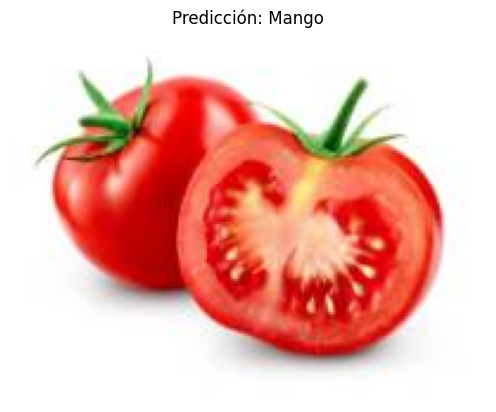

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


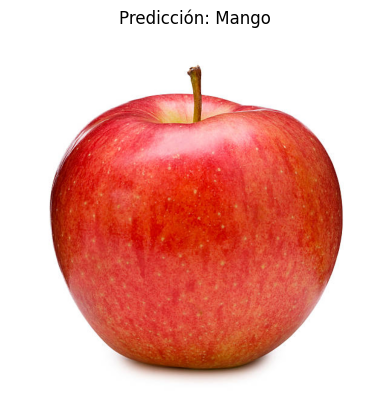

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


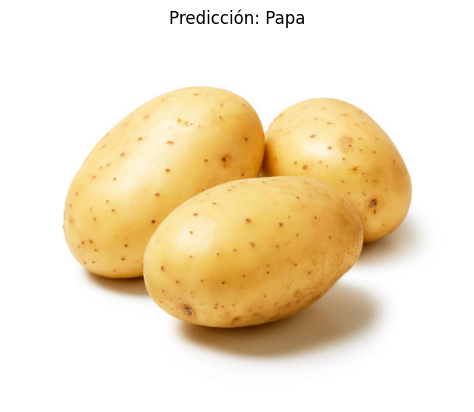

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


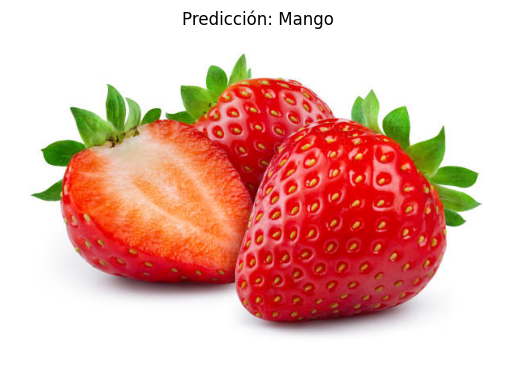

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


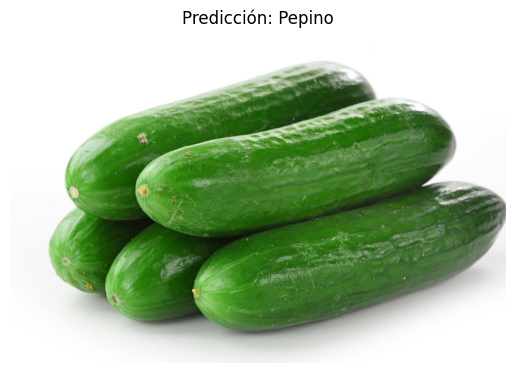

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


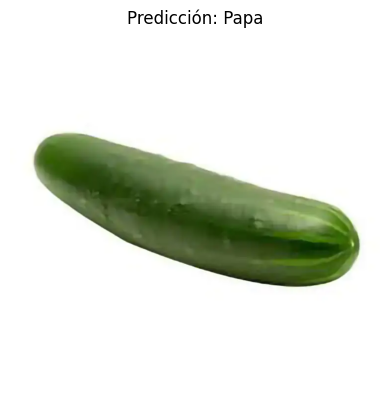

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


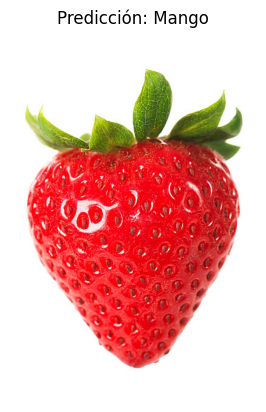

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


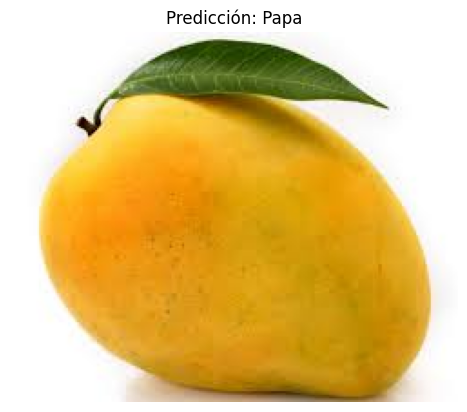

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


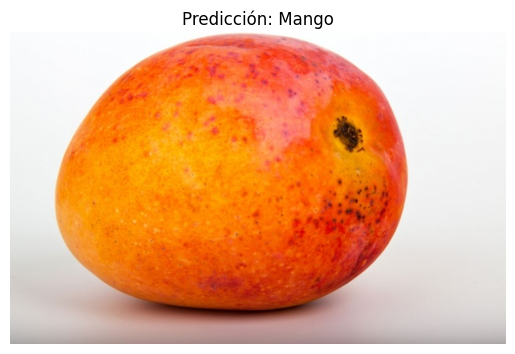

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


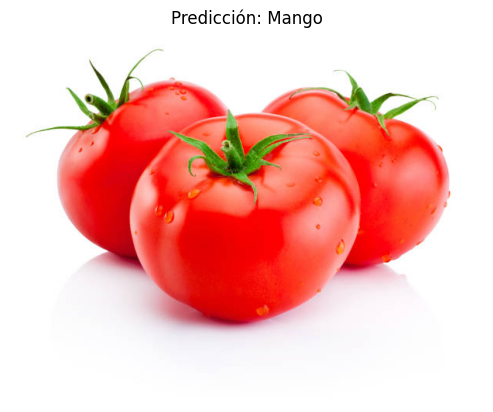

In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import os
import matplotlib.pyplot as plt

def load_and_preprocess_image(image_path):
    img = load_img(image_path, target_size=(64, 64))
    img_array = img_to_array(img)
    img_array = img_array / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    return img_array

# Ruta de la carpeta con imágenes de prueba
folder_path = '/content/drive/MyDrive/PROYECTO FINAL TEXT MINING/imagenes/pruebas'

# Lista de imágenes en la carpeta
image_files = os.listdir(folder_path)

# Predecir y mostrar imágenes
for image_file in image_files:
    image_path = os.path.join(folder_path, image_file)
    if os.path.isfile(image_path):
        # Cargar y preprocesar la imagen
        image_to_predict = load_and_preprocess_image(image_path)

        # Hacer la predicción con el nuevo modelo
        predictions = cnn_v2.predict(image_to_predict)

        # Obtener la clase predicha
        predicted_class_index = np.argmax(predictions, axis=1)[0]
        predicted_class_name = class_names[predicted_class_index]

        # Mostrar la imagen y el resultado
        plt.imshow(load_img(image_path))
        plt.title(f'Predicción: {predicted_class_name}')
        plt.axis('off')
        plt.show()


In [30]:
# Evaluaacion Modelo No.2
loss, accuracy = cnn_v3.evaluate(test_data_flow, steps=100)
print(f'Pérdida: {loss:.4f}')
print(f'Precisión: {accuracy:.4f}')


 36/100 ━━━━━━━━━━━━━━━━━━━━ 31s 495ms/step - accuracy: 0.2141 - loss: 7.2570

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


100/100 ━━━━━━━━━━━━━━━━━━━━ 18s 176ms/step - accuracy: 0.2632 - loss: 5.9735


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


Pérdida: 5.2515
Precisión: 0.2909


### Modelo No.3 Arquitectura de Red

In [28]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Ruta de las imágenes
str_img = '/content/drive/MyDrive/PROYECTO FINAL TEXT MINING/imagenes/train_set'

# Inicialización del modelo
cnn_v4 = Sequential()

# Primera capa convolucional
cnn_v4.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(64, 64, 3)))
cnn_v4.add(BatchNormalization())
cnn_v4.add(MaxPooling2D(pool_size=(2, 2)))
cnn_v4.add(Dropout(0.25))

# Segunda capa convolucional
cnn_v4.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
cnn_v4.add(BatchNormalization())
cnn_v4.add(MaxPooling2D(pool_size=(2, 2)))
cnn_v4.add(Dropout(0.25))

# Tercera capa convolucional
cnn_v4.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
cnn_v4.add(BatchNormalization())
cnn_v4.add(MaxPooling2D(pool_size=(2, 2)))
cnn_v4.add(Dropout(0.25))

# Cuarta capa convolucional
cnn_v4.add(Conv2D(filters=256, kernel_size=(3, 3), activation='relu'))
cnn_v4.add(BatchNormalization())
cnn_v4.add(MaxPooling2D(pool_size=(2, 2)))
cnn_v4.add(Dropout(0.25))

# Aplanar la salida para las capas densas
cnn_v4.add(Flatten())

# Capa densa intermedia
cnn_v4.add(Dense(units=512, activation='relu'))
cnn_v4.add(Dropout(0.5))

# Capa de salida para clasificación multiclase
cnn_v4.add(Dense(units=6, activation='softmax'))  # 6 unidades y softmax para clasificación multiclase

# Compilación del modelo
cnn_v4.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Resumen del modelo
cnn_v4.summary()

# Configuración de aumentación de datos
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)

train_data_flow = train_datagen.flow_from_directory(
    str_img,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_data_flow = train_datagen.flow_from_directory(
    str_img,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

# Entrenamiento del modelo
cnn_v4.fit(
    train_data_flow,
    steps_per_epoch=train_data_flow.samples // train_data_flow.batch_size,
    validation_data=validation_data_flow,
    validation_steps=validation_data_flow.samples // validation_data_flow.batch_size,
    epochs=20  # Puedes aumentar el número de épocas según sea necesario
)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_13 (Conv2D)                   │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_11               │ (None, 62, 62, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 29, 29, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_12               │ (None, 29, 29, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 12, 12, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_13               │ (None, 12, 12, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 4, 4, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_14               │ (None, 4, 4, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 2, 2, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 2, 2, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 918,214 (3.50 MB)

 Trainable params: 917,254 (3.50 MB)

 Non-trainable params: 960 (3.75 KB)

Found 1996 images belonging to 6 classes.
Found 495 images belonging to 6 classes.
Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


62/62 ━━━━━━━━━━━━━━━━━━━━ 66s 945ms/step - accuracy: 0.4318 - loss: 2.3393 - val_accuracy: 0.1229 - val_loss: 4.0412
Epoch 2/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7500 - loss: 0.7090 - val_accuracy: 0.1333 - val_loss: 4.2877
Epoch 3/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 73s 824ms/step - accuracy: 0.6754 - loss: 0.9612 - val_accuracy: 0.1208 - val_loss: 7.8797
Epoch 4/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7812 - loss: 0.7429 - val_accuracy: 0.0667 - val_loss: 9.7956
Epoch 5/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 82s 820ms/step - accuracy: 0.7253 - loss: 0.7340 - val_accuracy: 0.1500 - val_loss: 8.0895
Epoch 6/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7500 - loss: 0.7789 - val_accuracy: 0.2000 - val_loss: 8.7095
Epoch 7/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 80s 809ms/step - accuracy: 0.8272 - loss: 0.5286 - val_accuracy: 0.1792 - val_loss: 7.8873
Epoch 8/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.7188 - loss: 0.6772 - val_accuracy: 0.2000 - val_los

### Prueba Modelo

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 745ms/step


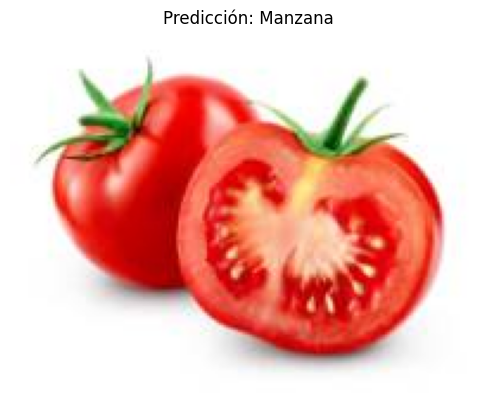

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


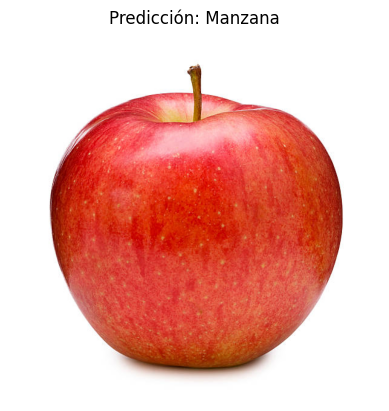

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


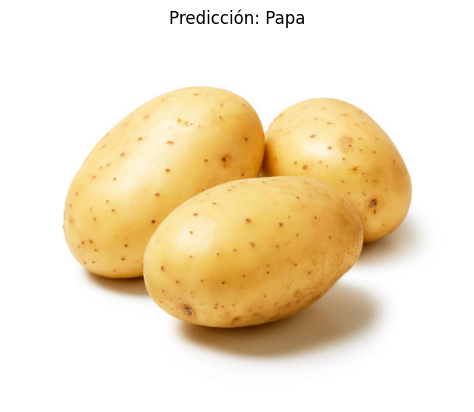

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


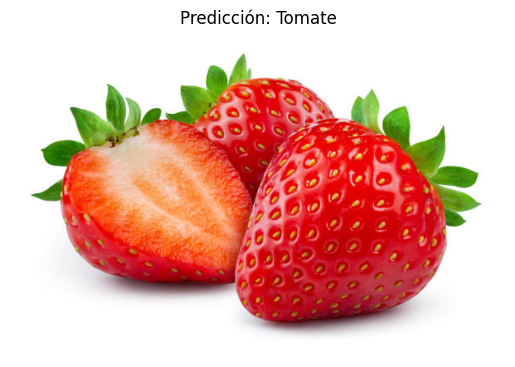

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


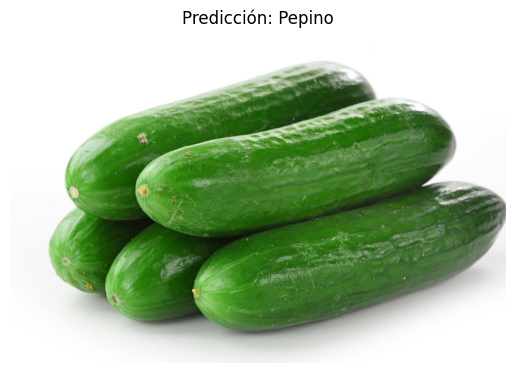

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


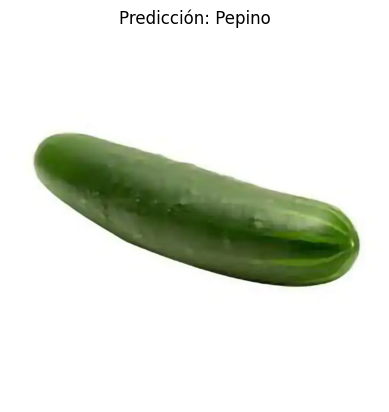

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


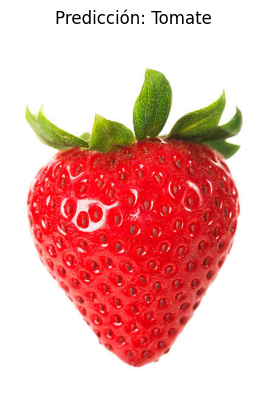

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


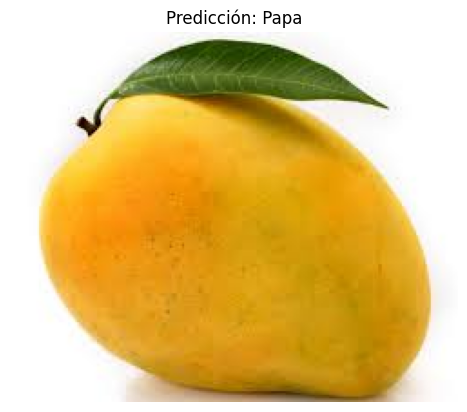

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


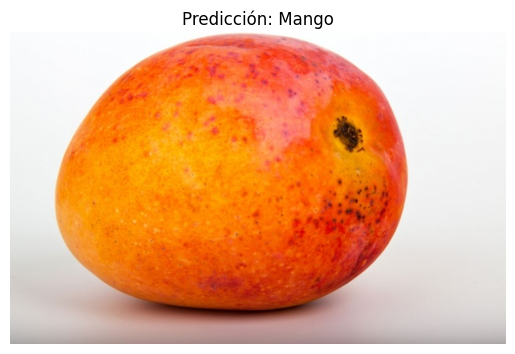

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


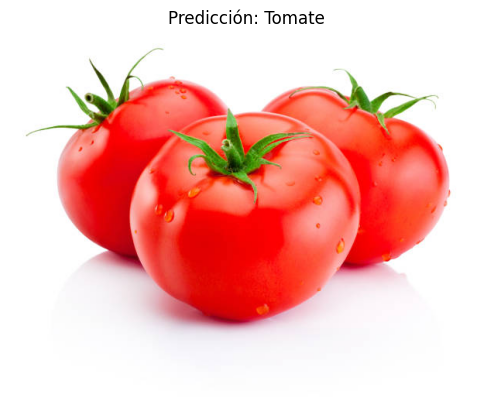

In [29]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import os
import matplotlib.pyplot as plt

def load_and_preprocess_image(image_path):
    img = load_img(image_path, target_size=(64, 64))
    img_array = img_to_array(img)
    img_array = img_array / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    return img_array

# Ruta de la carpeta con imágenes de prueba
folder_path = '/content/drive/MyDrive/PROYECTO FINAL TEXT MINING/imagenes/pruebas'

# Lista de imágenes en la carpeta
image_files = os.listdir(folder_path)

# Predecir y mostrar imágenes
for image_file in image_files:
    image_path = os.path.join(folder_path, image_file)
    if os.path.isfile(image_path):
        # Cargar y preprocesar la imagen
        image_to_predict = load_and_preprocess_image(image_path)

        # Hacer la predicción con el nuevo modelo
        predictions = cnn_v4.predict(image_to_predict)

        # Obtener la clase predicha
        predicted_class_index = np.argmax(predictions, axis=1)[0]
        predicted_class_name = class_names[predicted_class_index]

        # Mostrar la imagen y el resultado
        plt.imshow(load_img(image_path))
        plt.title(f'Predicción: {predicted_class_name}')
        plt.axis('off')
        plt.show()


In [31]:
# Evaluaacion Modelo No.2
loss, accuracy = cnn_v4.evaluate(test_data_flow, steps=100)
print(f'Pérdida: {loss:.4f}')
print(f'Precisión: {accuracy:.4f}')


100/100 ━━━━━━━━━━━━━━━━━━━━ 17s 167ms/step - accuracy: 0.4340 - loss: 4.9367
Pérdida: 3.9430
Precisión: 0.4641


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


### Eleccion de Modelo:
Se decidio elegir el modelo 1 debido a su destacada precisión y menor pérdida en comparación con otros modelos. Los resultados obtenidos muestran que el modelo alcanzó una precisión de 0.7100 y una pérdida de 0.8771, lo que indica un rendimiento superior en la tarea de clasificación. Además, con un tiempo de ejecución de 16 segundos y un tiempo de procesamiento de 160 ms por paso, el modelo demuestra eficiencia y efectividad.

La precisión es un factor clave en el contexto de este modelo de neuronas, y su rendimiento de 0.6824 refuerza la confianza en su capacidad para generalizar correctamente a nuevos datos. En resumen, el modelo 1 no solo ofrece una mejor precisión, sino también una pérdida más baja, lo que lo convierte en la opción más confiable.